credits: github tutorials by aymericdamien: https://github.com/aymericdamien/TensorFlow-Examples and sjchoi86: https://github.com/sjchoi86 as well as the Tensorflow documentation.

In [1]:
import numpy as np
import tensorflow as tf
print ("PACKAGES LOADED")

PACKAGES LOADED


## Session

A session is the basic building block for running machine learning and tensor flow operations.

Here we create a new session called sess


In [2]:

sess = tf.Session()
print ("OPEN SESSION")

OPEN SESSION


Now that we have a session, we can define some tensor flow .  The simpliest is the constant

In [3]:
hello = tf.constant("Hello World")
print(type(hello))
print(hello)
print(sess.run(hello))

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("Const:0", shape=(), dtype=string)
b'Hello World'


We can also define floats and ints

In [4]:
a = tf.constant(1.5)
b = tf.constant(int(2))
print(a)
print(b)
c = tf.constant(2.5)
print(c)


Tensor("Const_1:0", shape=(), dtype=float32)
Tensor("Const_2:0", shape=(), dtype=int32)
Tensor("Const_3:0", shape=(), dtype=float32)


In [5]:
print(sess.run(a*c))
d = tf.add(a,c)
e = tf.multiply(a,c)
print(d,a+c,e,a*c)
print(sess.run(d),sess.run(a+c),sess.run(e),sess.run(a*c))

3.75
Tensor("Add:0", shape=(), dtype=float32) Tensor("add:0", shape=(), dtype=float32) Tensor("Mul:0", shape=(), dtype=float32) Tensor("mul_1:0", shape=(), dtype=float32)
4.0 4.0 3.75 3.75


# Variables

We can define variables:

In [6]:
weight = tf.Variable(tf.random_normal([5,2], stddev=0.1))
print(weight)


<tf.Variable 'Variable:0' shape=(5, 2) dtype=float32_ref>


In [7]:
print(sess.run(weight))

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: _retval_Variable_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable)]]

# Why the error

Variables have to be initialized.

tf.variables_initializer takes as input a list of variables and returns a function which can be run which will initialize your variables.

In [8]:
init = tf.variables_initializer([weight])
sess.run(init)
print(sess.run(weight))

[[ 0.08553339 -0.05080976]
 [ 0.15046509 -0.04355966]
 [ 0.15114264  0.13053378]
 [ 0.04833764  0.23851185]
 [-0.15537418 -0.09480762]]


# Placeholder

Creates a placeholder for a variable which can be/will be inputted later. Similar to initializing variables in C++ and Fortran, but we can perform operations on them.


In [9]:
x = tf.placeholder(tf.float32, shape=(1024,1024))
y = tf.matmul(x,x)


In [10]:
print(sess.run(y))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [1024,1024]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[1024,1024], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-52f68a61a488>", line 1, in <module>
    x = tf.placeholder(tf.float32, shape=(1024,1024))
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1777, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4521, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/home/peter/anaconda3/envs/machineLearning/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [1024,1024]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[1024,1024], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


Error due to not passing in values for the placeholder.

In [11]:
rand_array = np.random.rand(1024,1024)
print(sess.run(y, feed_dict={x:rand_array}))

[[262.14642 259.8832  267.0034  ... 263.8831  259.02563 264.77747]
 [256.74026 253.49194 252.77773 ... 264.39993 260.72073 259.58774]
 [248.14578 239.7221  248.65063 ... 259.1953  246.42046 251.70082]
 ...
 [256.5135  244.93593 254.14595 ... 258.22314 248.29547 248.66966]
 [257.0766  252.41388 256.06717 ... 261.5952  251.72714 256.65344]
 [261.93008 259.11053 268.3007  ... 265.2009  266.86118 265.2026 ]]


## Linear Regression Example

Now that we have a tiny experience with tensorflow, we are going to use this to and train a linear regresion.

In [12]:
sess.close()

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#Define some paramters
learningRate = 0.01
trainingEpochs = 1000
displayStep = 50

In [14]:
xData = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
yData = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

dataPoints = xData.shape[0]
print(type(xData))
print(xData)


<class 'numpy.ndarray'>
[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ]


In [15]:
#Define tensorflow graph
X = tf.placeholder("float")
Y = tf.placeholder("float")

#Define model variables to be solved for
W = tf.Variable(np.random.randn(), name = 'slope')
b = tf.Variable(np.random.randn(), name = 'y-intercept')
model = W*X + b

In [16]:
# Define cost function
cost = tf.reduce_sum(tf.pow(model - Y,2)/(2*dataPoints))
#Set up gradient descent
optimizer = tf.train.GradientDescentOptimizer(learningRate).minimize(cost)

In [17]:
init = tf.variables_initializer([W, b])

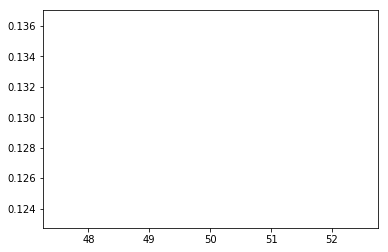

Epoch: 0050 cost= 0.129877791 W= 0.37825587 b= -0.124121025


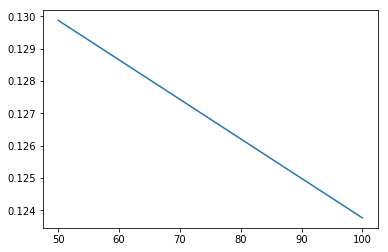

Epoch: 0100 cost= 0.123763241 W= 0.37060374 b= -0.069071956


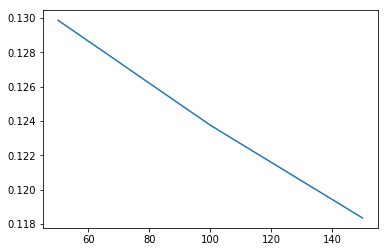

Epoch: 0150 cost= 0.118355021 W= 0.36340672 b= -0.01729686


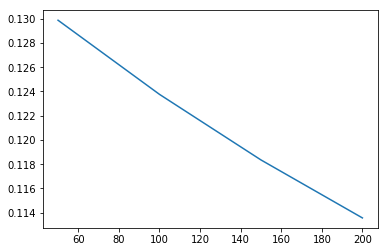

Epoch: 0200 cost= 0.113571562 W= 0.35663763 b= 0.031398855


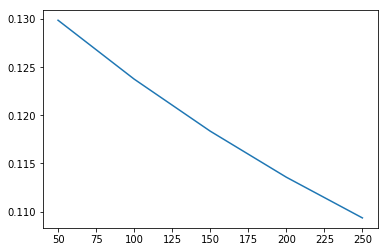

Epoch: 0250 cost= 0.109340765 W= 0.35027125 b= 0.07719849


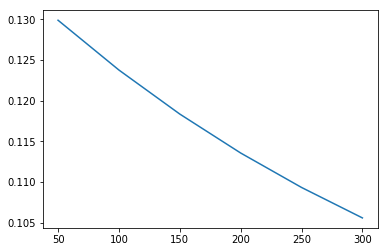

Epoch: 0300 cost= 0.105598770 W= 0.3442835 b= 0.12027419


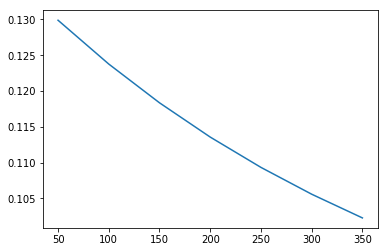

Epoch: 0350 cost= 0.102289133 W= 0.33865178 b= 0.16078813


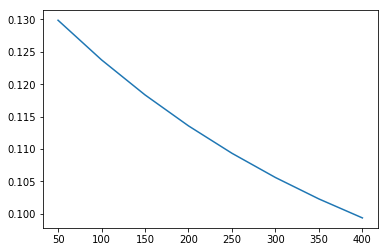

Epoch: 0400 cost= 0.099361934 W= 0.3333551 b= 0.1988925


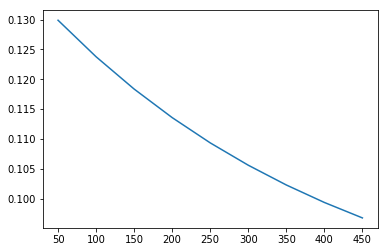

Epoch: 0450 cost= 0.096773051 W= 0.32837334 b= 0.23473041


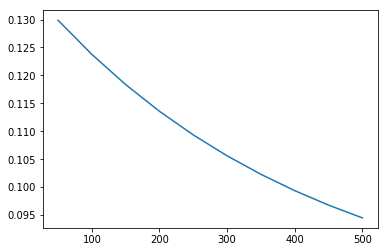

Epoch: 0500 cost= 0.094483368 W= 0.32368797 b= 0.26843664


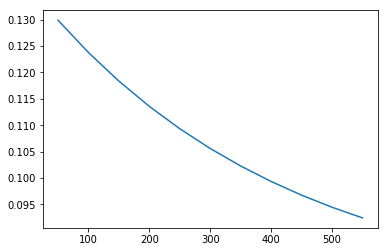

Epoch: 0550 cost= 0.092458300 W= 0.31928122 b= 0.3001388


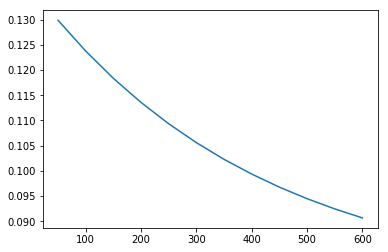

Epoch: 0600 cost= 0.090667330 W= 0.31513652 b= 0.32995522


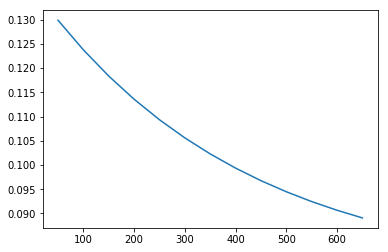

Epoch: 0650 cost= 0.089083411 W= 0.31123832 b= 0.35799822


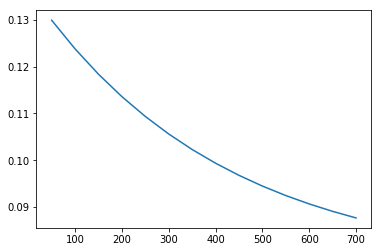

Epoch: 0700 cost= 0.087682627 W= 0.30757204 b= 0.38437372


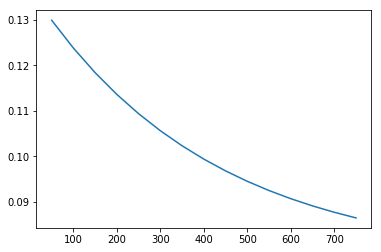

Epoch: 0750 cost= 0.086443789 W= 0.3041237 b= 0.40918052


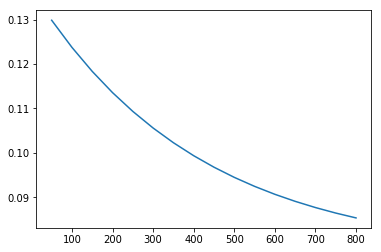

Epoch: 0800 cost= 0.085348256 W= 0.30088064 b= 0.4325113


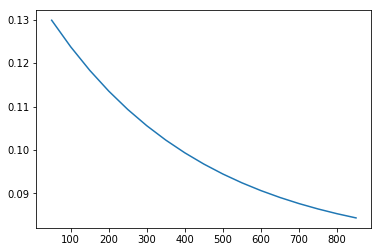

Epoch: 0850 cost= 0.084379420 W= 0.29783025 b= 0.454455


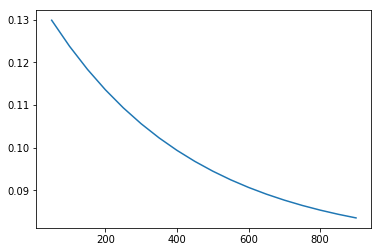

Epoch: 0900 cost= 0.083522625 W= 0.29496136 b= 0.47509405


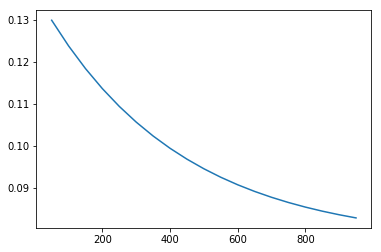

Epoch: 0950 cost= 0.082765013 W= 0.29226324 b= 0.49450403


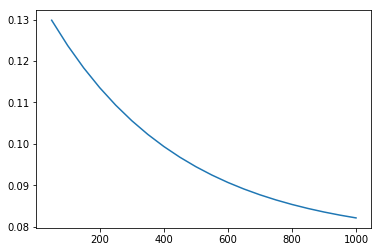

Epoch: 1000 cost= 0.082095027 W= 0.28972545 b= 0.5127608
Optimization Finished!


In [18]:
sess = tf.Session()
sess.run(init)  # initialize variables
iteration = []
costs = []
for epoch in range(trainingEpochs):
    for (x, y) in zip(xData,yData):
        sess.run(optimizer, feed_dict={X:x, Y:y}) #Run gradient descent for each data point
    if (epoch+1) % displayStep == 0:
        c = sess.run(cost, feed_dict={X:xData, Y:yData})
        iteration.append(epoch+1)
        costs.append(c)
        plt.plot(np.asarray(iteration), np.asarray(costs))
        plt.show()
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")


Training cost= 0.08209503 W= 0.28972545 b= 0.5127608 



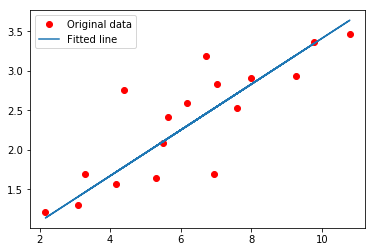

In [19]:
training_cost = sess.run(cost, feed_dict={X: xData, Y: yData})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
plt.plot(xData, yData, 'ro', label='Original data')
plt.plot(xData, sess.run(W) * xData + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [20]:
sess.close()

# Our First Neural Network

We will use the MNIST handwritten data to train a neural network in Tensorflow.  Hooray!!!  In this case we will create a neural network with 2 hidden layers.  The first with 256 neurons and the second with 256 neurons. 

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  
print ("PACKAGES LOADED")

Instructions for updating:
Use the retry module or similar alternatives.
PACKAGES LOADED


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


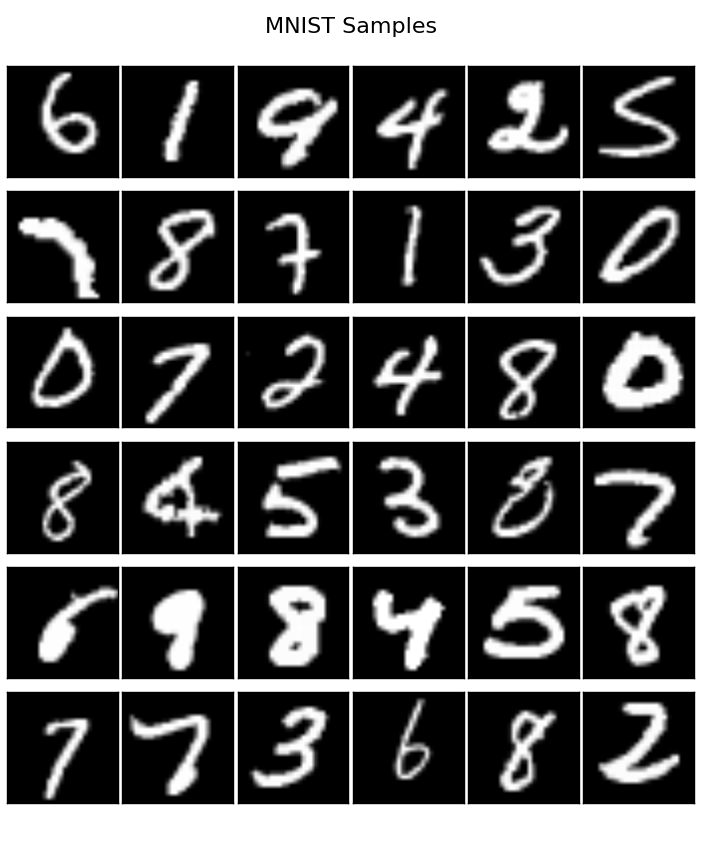

In [23]:
mnist = input_data.read_data_sets('data/', one_hot=True) #Download MNIST data set
from IPython.display import Image
Image("mnistSample.png")

In [24]:
# Parameters
learning_rate = 0.01
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 8 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [25]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [26]:


# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer



In [27]:
# Construct model
logits = neural_net(X)

# Define loss and optimizer
try :
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=Y))
except:
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [28]:
# Start training
iteration =[]
costs = []
sess =  tf.Session()

# Run the initializer
sess.run(init)

for step in range(1, num_steps+1):
   batch_x, batch_y = mnist.train.next_batch(batch_size)
   # Run optimization op (backprop)
   sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
   if step % display_step == 0 or step == 1:
       # Calculate batch loss and accuracy
       loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                             Y: batch_y})
       iteration.append(step)
       costs.append(1-accuracy)
       #plt.plot(np.asarray(iteration), np.asarray(costs))
       #plt.hold
       #plt.show()
       print("Step " + str(step) + ", Minibatch Loss= " + \
             "{:.4f}".format(loss) + ", Training Accuracy= " + \
             "{:.3f}".format(acc))

print("Optimization Finished!")

# Calculate accuracy for MNIST test images
print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels}))

Step 1, Minibatch Loss= 519.9854, Training Accuracy= 0.055
Step 100, Minibatch Loss= 32.8714, Training Accuracy= 0.805
Step 200, Minibatch Loss= 20.1212, Training Accuracy= 0.766
Step 300, Minibatch Loss= 11.1445, Training Accuracy= 0.812
Step 400, Minibatch Loss= 13.1401, Training Accuracy= 0.875
Step 500, Minibatch Loss= 3.1424, Training Accuracy= 0.867
Optimization Finished!
Testing Accuracy: 0.8251


In [29]:
xs, ys = mnist.train.next_batch(batch_size)
print(xs[0])
print(ys[0])
print(type(ys[0]))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [30]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt
# Get a batch of two random images and show in a pop-up window.
batch_xs, batch_ys = mnist.test.next_batch(batch_size)
#print(batch_xs[0])
#gen_image(batch_xs[0]).show()
#gen_image(batch_xs[1]).show()

128
Image:


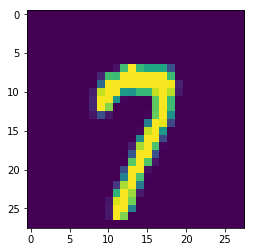

Given Value:  7
Predicted Value: 7 




Image:


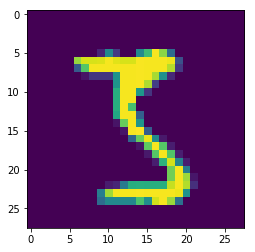

Given Value:  3
Predicted Value: 3 




Image:


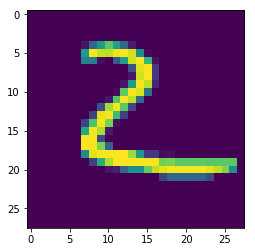

Given Value:  2
Predicted Value: 2 




Image:


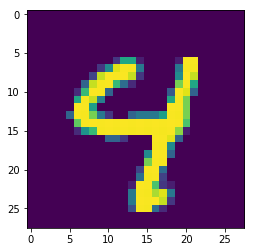

Given Value:  4
Predicted Value: 9 




Image:


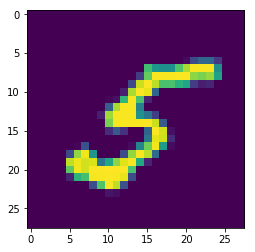

Given Value:  5
Predicted Value: 5 




Image:


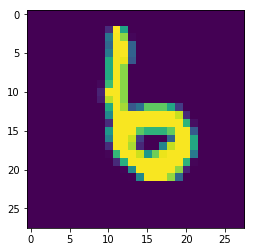

Given Value:  6
Predicted Value: 6 




Image:


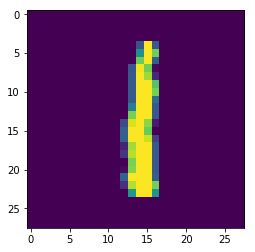

Given Value:  1
Predicted Value: 1 




Image:


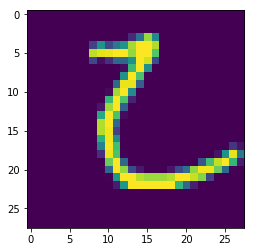

Given Value:  2
Predicted Value: 2 




Image:


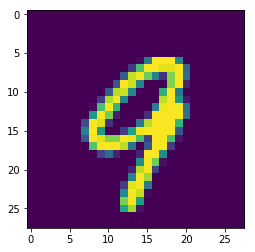

Given Value:  9
Predicted Value: 9 




Image:


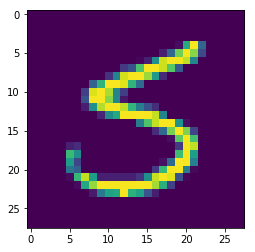

Given Value:  5
Predicted Value: 9 




Image:


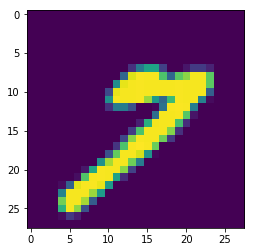

Given Value:  7
Predicted Value: 7 




Image:


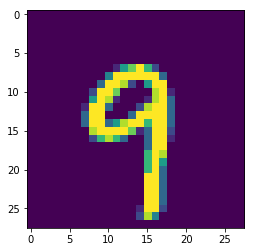

Given Value:  9
Predicted Value: 9 




Image:


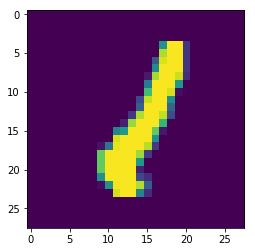

Given Value:  1
Predicted Value: 2 




Image:


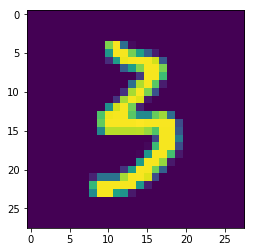

Given Value:  3
Predicted Value: 3 




Image:


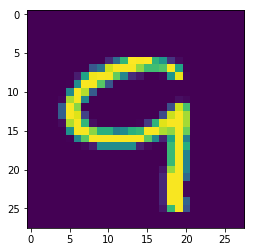

Given Value:  9
Predicted Value: 9 




Image:


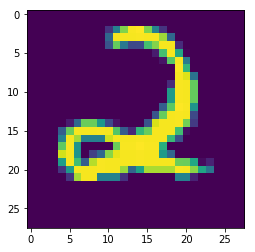

Given Value:  2
Predicted Value: 2 




Image:


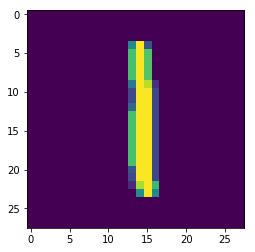

Given Value:  1
Predicted Value: 1 




Image:


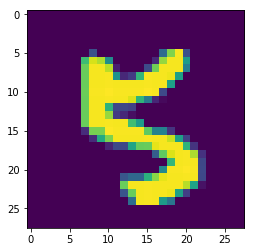

Given Value:  5
Predicted Value: 5 




Image:


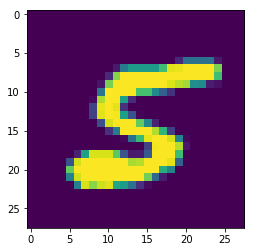

Given Value:  5
Predicted Value: 0 




Image:


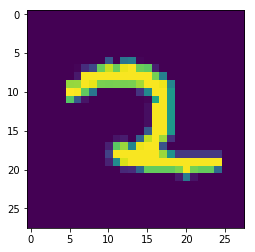

Given Value:  2
Predicted Value: 2 




Image:


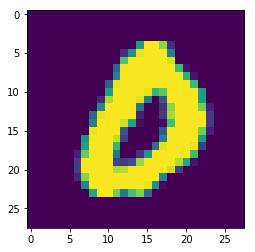

Given Value:  0
Predicted Value: 0 




Image:


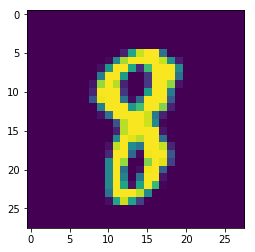

Given Value:  8
Predicted Value: 8 




Image:


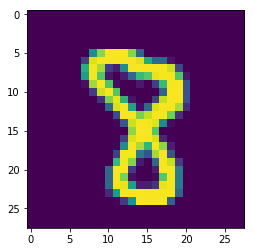

Given Value:  8
Predicted Value: 7 




Image:


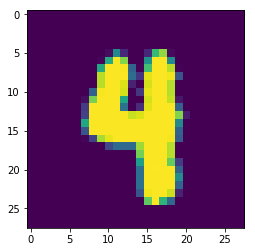

Given Value:  4
Predicted Value: 9 




Image:


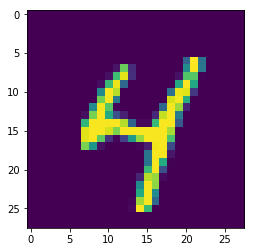

Given Value:  4
Predicted Value: 4 




Image:


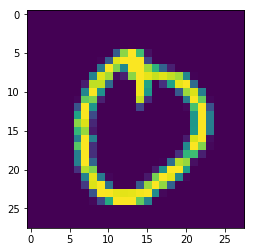

Given Value:  0
Predicted Value: 0 




Image:


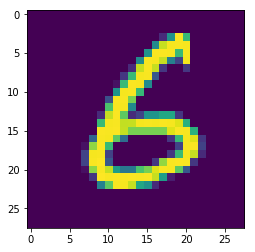

Given Value:  6
Predicted Value: 6 




Image:


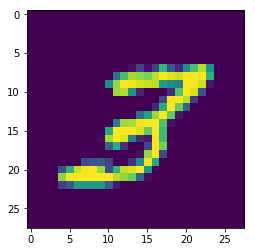

Given Value:  3
Predicted Value: 2 




Image:


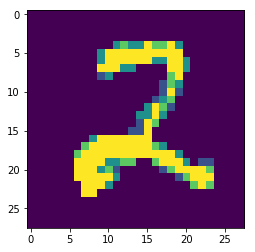

Given Value:  2
Predicted Value: 2 




Image:


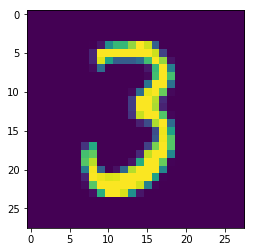

Given Value:  3
Predicted Value: 2 




Image:


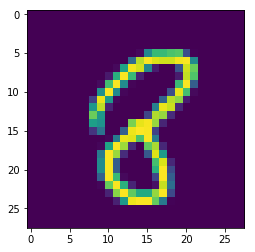

Given Value:  8
Predicted Value: 8 




Image:


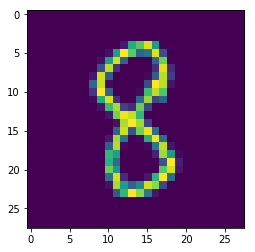

Given Value:  8
Predicted Value: 2 




Image:


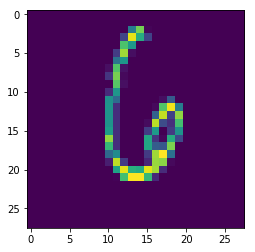

Given Value:  6
Predicted Value: 6 




Image:


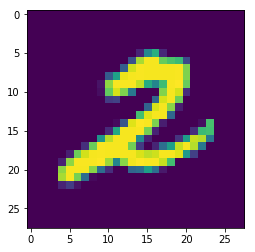

Given Value:  2
Predicted Value: 2 




Image:


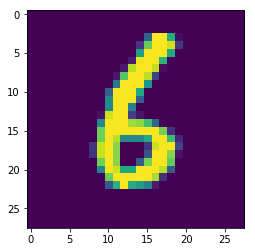

Given Value:  6
Predicted Value: 6 




Image:


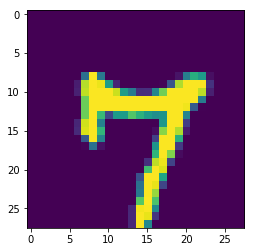

Given Value:  7
Predicted Value: 7 




Image:


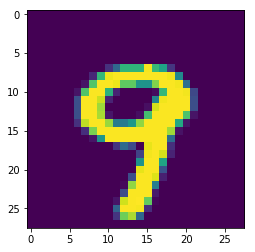

Given Value:  9
Predicted Value: 9 




Image:


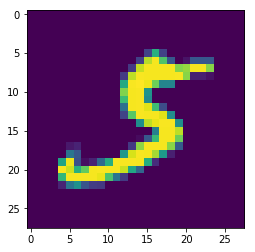

Given Value:  5
Predicted Value: 3 




Image:


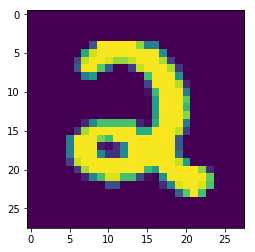

Given Value:  2
Predicted Value: 2 




Image:


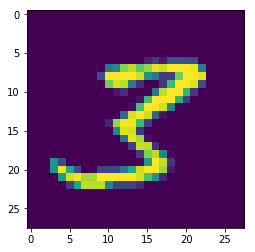

Given Value:  3
Predicted Value: 3 




Image:


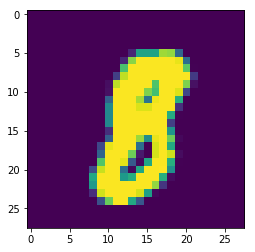

Given Value:  8
Predicted Value: 3 




Image:


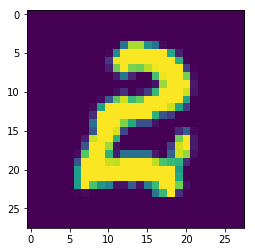

Given Value:  2
Predicted Value: 2 




Image:


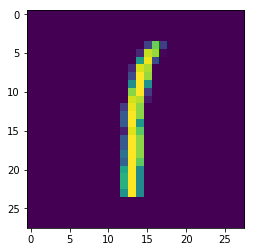

Given Value:  1
Predicted Value: 1 




Image:


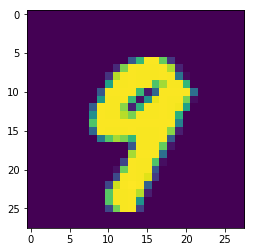

Given Value:  9
Predicted Value: 9 




Image:


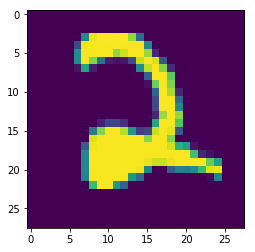

Given Value:  2
Predicted Value: 2 




Image:


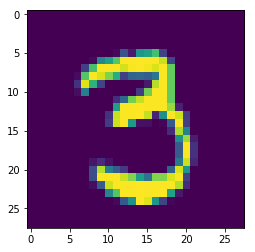

Given Value:  3
Predicted Value: 3 




Image:


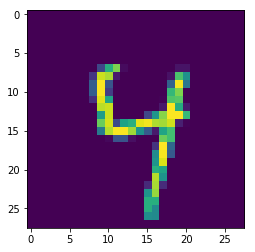

Given Value:  4
Predicted Value: 9 




Image:


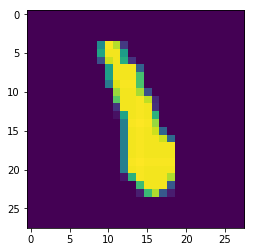

Given Value:  1
Predicted Value: 1 




Image:


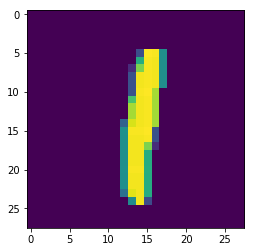

Given Value:  1
Predicted Value: 1 




Image:


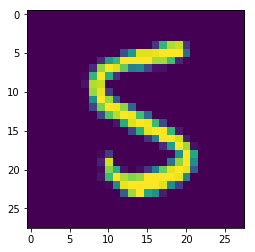

Given Value:  5
Predicted Value: 5 




Image:


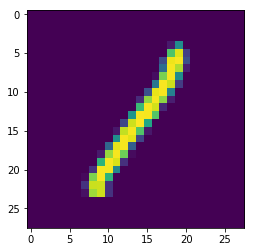

Given Value:  1
Predicted Value: 1 




Image:


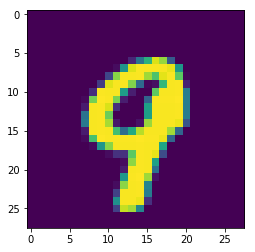

Given Value:  9
Predicted Value: 9 




Image:


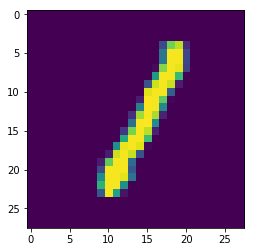

Given Value:  1
Predicted Value: 1 




Image:


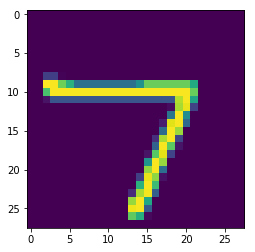

Given Value:  7
Predicted Value: 7 




Image:


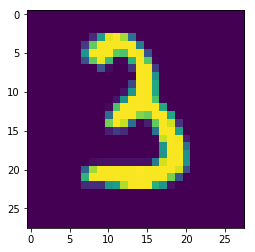

Given Value:  3
Predicted Value: 3 




Image:


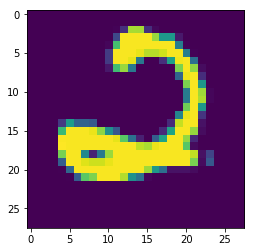

Given Value:  2
Predicted Value: 2 




Image:


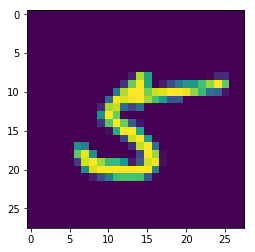

Given Value:  5
Predicted Value: 0 




Image:


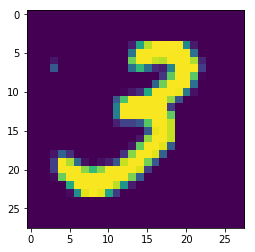

Given Value:  3
Predicted Value: 3 




Image:


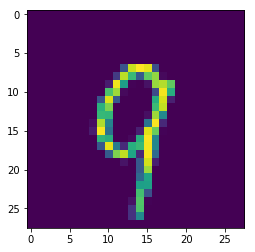

Given Value:  9
Predicted Value: 9 




Image:


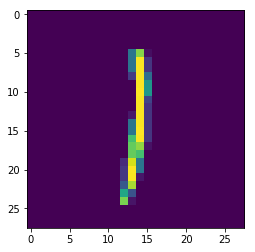

Given Value:  1
Predicted Value: 1 




Image:


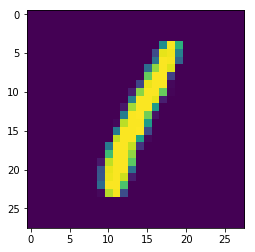

Given Value:  1
Predicted Value: 1 




Image:


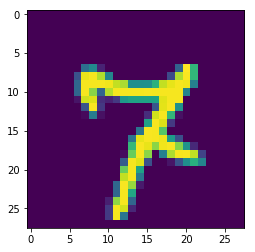

Given Value:  7
Predicted Value: 7 




Image:


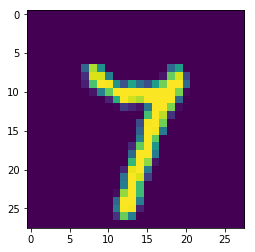

Given Value:  7
Predicted Value: 7 




Image:


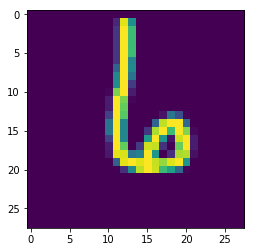

Given Value:  6
Predicted Value: 6 




Image:


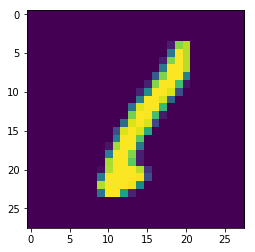

Given Value:  1
Predicted Value: 1 




Image:


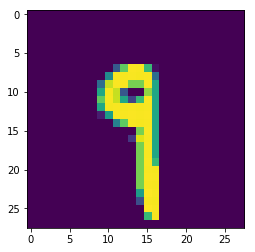

Given Value:  9
Predicted Value: 9 




Image:


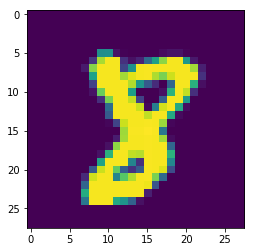

Given Value:  8
Predicted Value: 8 




Image:


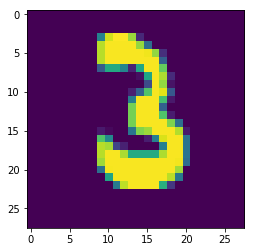

Given Value:  3
Predicted Value: 2 




Image:


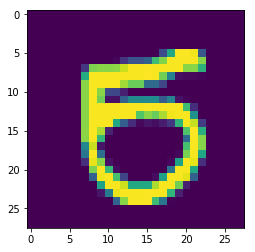

Given Value:  5
Predicted Value: 0 




Image:


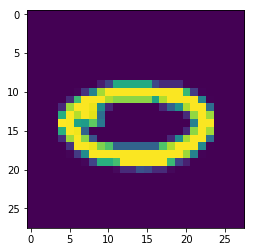

Given Value:  0
Predicted Value: 7 




Image:


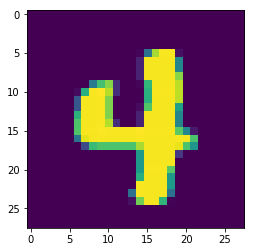

Given Value:  4
Predicted Value: 4 




Image:


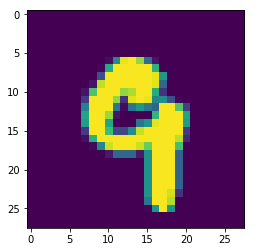

Given Value:  9
Predicted Value: 9 




Image:


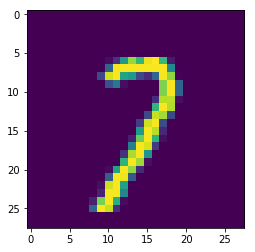

Given Value:  7
Predicted Value: 7 




Image:


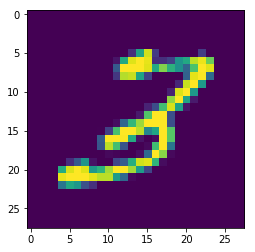

Given Value:  3
Predicted Value: 2 




Image:


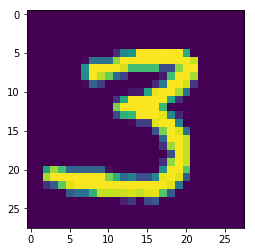

Given Value:  3
Predicted Value: 3 




Image:


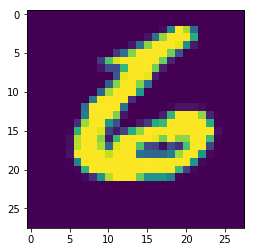

Given Value:  6
Predicted Value: 6 




Image:


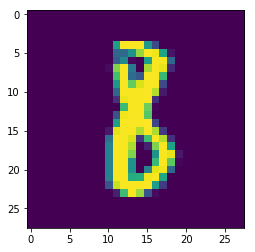

Given Value:  8
Predicted Value: 1 




Image:


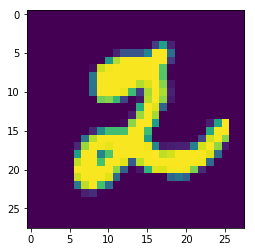

Given Value:  2
Predicted Value: 2 




Image:


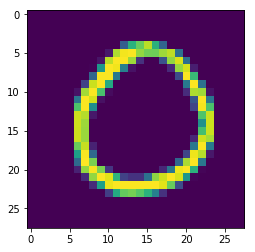

Given Value:  0
Predicted Value: 0 




Image:


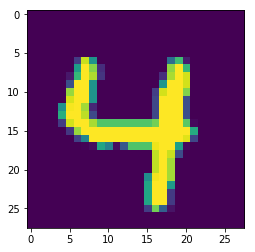

Given Value:  4
Predicted Value: 9 




Image:


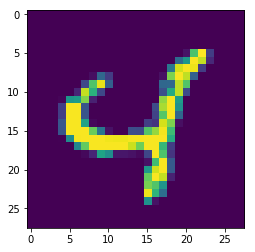

Given Value:  4
Predicted Value: 9 




Image:


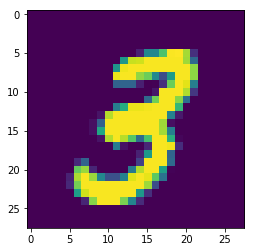

Given Value:  3
Predicted Value: 3 




Image:


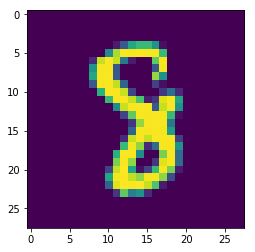

Given Value:  8
Predicted Value: 2 




Image:


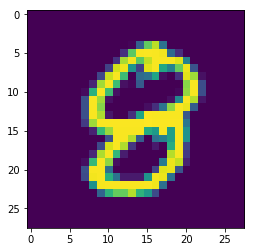

Given Value:  8
Predicted Value: 8 




Image:


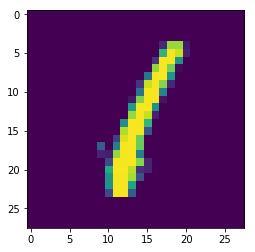

Given Value:  1
Predicted Value: 1 




Image:


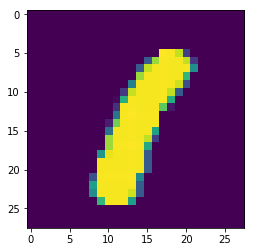

Given Value:  1
Predicted Value: 8 




Image:


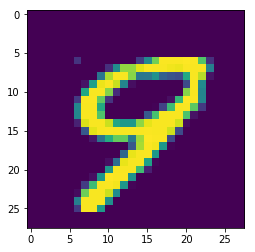

Given Value:  9
Predicted Value: 9 




Image:


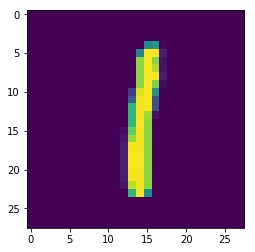

Given Value:  1
Predicted Value: 1 




Image:


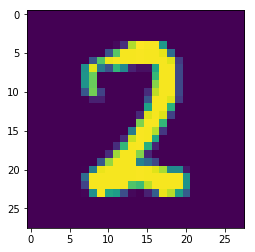

Given Value:  2
Predicted Value: 2 




Image:


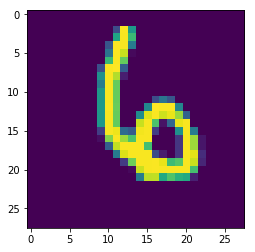

Given Value:  6
Predicted Value: 6 




Image:


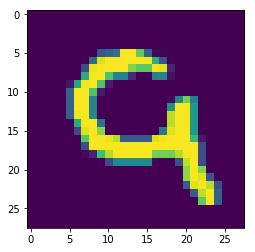

Given Value:  9
Predicted Value: 9 




Image:


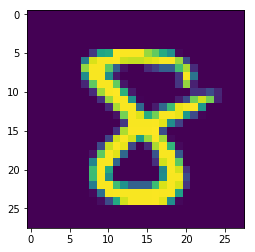

Given Value:  8
Predicted Value: 8 




Image:


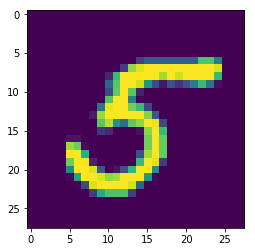

Given Value:  5
Predicted Value: 5 




Image:


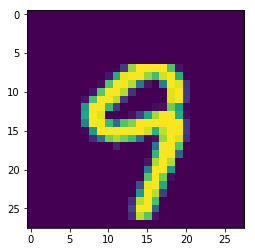

Given Value:  9
Predicted Value: 9 




Image:


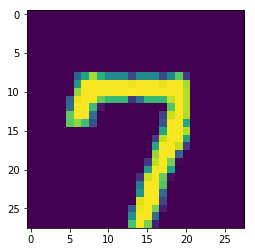

Given Value:  7
Predicted Value: 7 




Image:


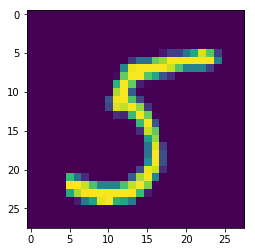

Given Value:  5
Predicted Value: 5 




Image:


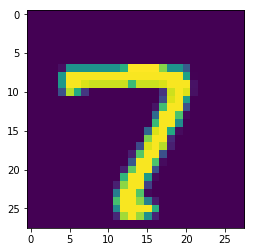

Given Value:  7
Predicted Value: 7 




Image:


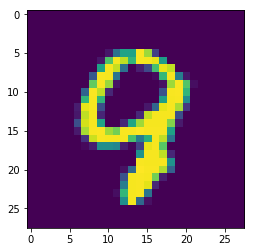

Given Value:  9
Predicted Value: 9 




Image:


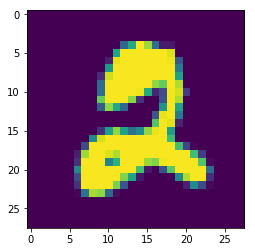

Given Value:  2
Predicted Value: 2 




Image:


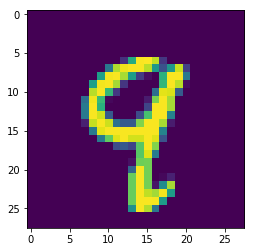

Given Value:  9
Predicted Value: 9 




Image:


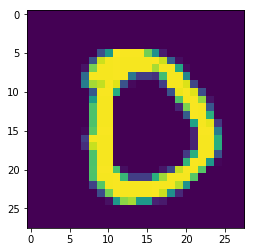

Given Value:  0
Predicted Value: 0 




Image:


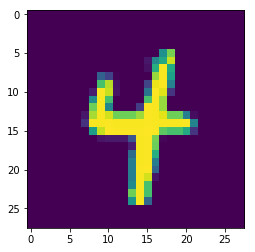

Given Value:  4
Predicted Value: 9 




Image:


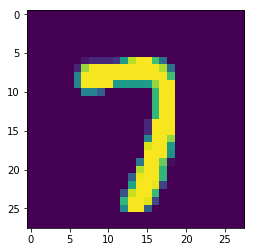

Given Value:  7
Predicted Value: 7 




Image:


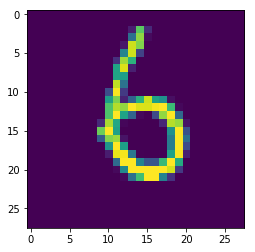

Given Value:  6
Predicted Value: 6 




Image:


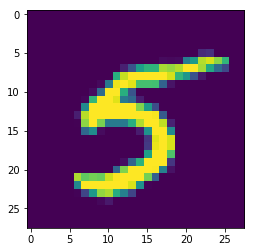

Given Value:  5
Predicted Value: 5 




Image:


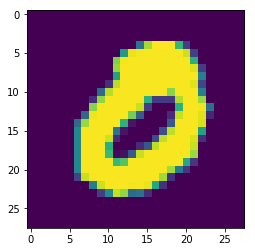

Given Value:  0
Predicted Value: 0 




Image:


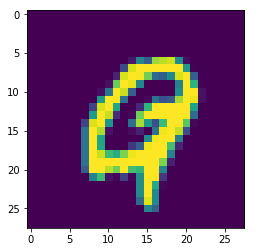

Given Value:  9
Predicted Value: 9 




Image:


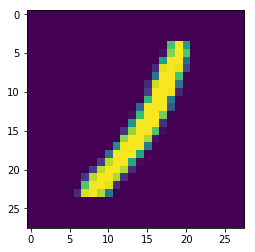

Given Value:  1
Predicted Value: 1 




Image:


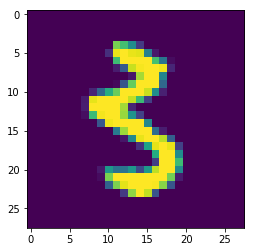

Given Value:  3
Predicted Value: 5 




Image:


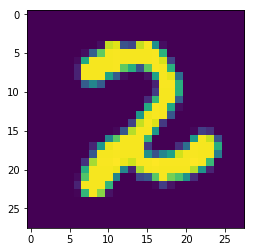

Given Value:  2
Predicted Value: 2 




Image:


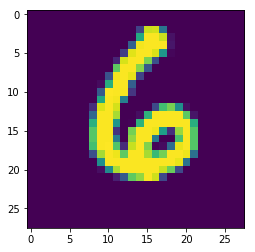

Given Value:  6
Predicted Value: 6 




Image:


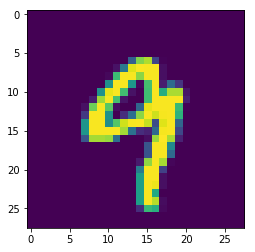

Given Value:  9
Predicted Value: 9 




Image:


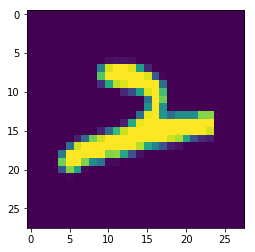

Given Value:  2
Predicted Value: 9 




Image:


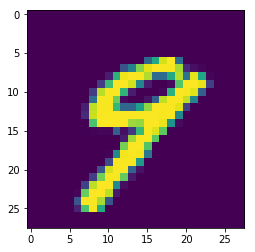

Given Value:  9
Predicted Value: 9 




Image:


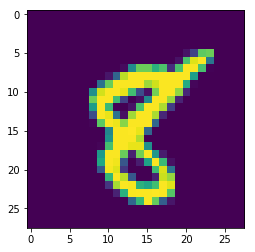

Given Value:  8
Predicted Value: 8 




Image:


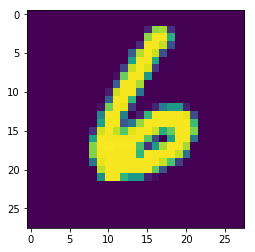

Given Value:  6
Predicted Value: 6 




Image:


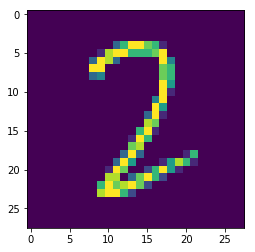

Given Value:  2
Predicted Value: 2 




Image:


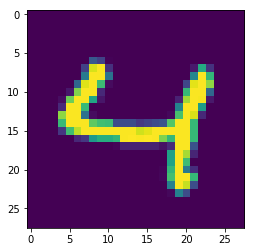

Given Value:  4
Predicted Value: 9 




Image:


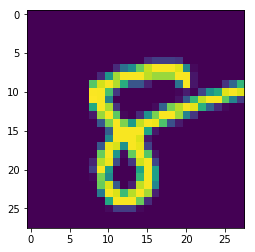

Given Value:  8
Predicted Value: 8 




Image:


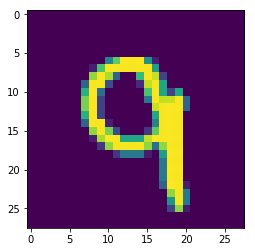

Given Value:  9
Predicted Value: 9 




Image:


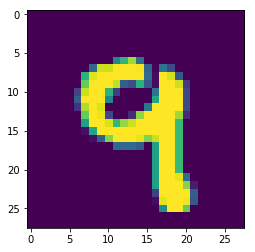

Given Value:  9
Predicted Value: 9 




Image:


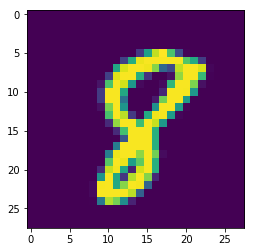

Given Value:  8
Predicted Value: 8 




Image:


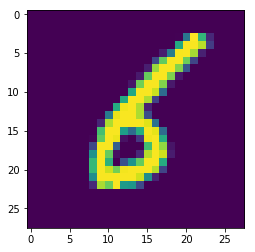

Given Value:  6
Predicted Value: 6 




Image:


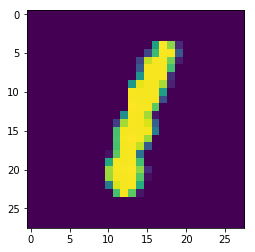

Given Value:  1
Predicted Value: 1 




Image:


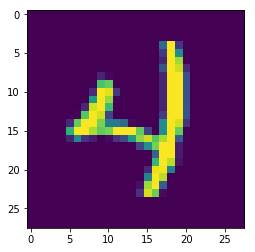

Given Value:  4
Predicted Value: 4 




Image:


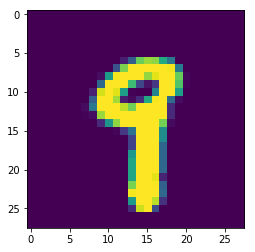

Given Value:  9
Predicted Value: 9 




Image:


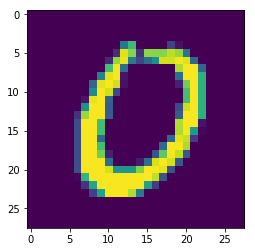

Given Value:  0
Predicted Value: 0 




Image:


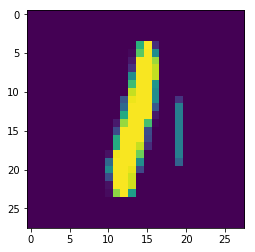

Given Value:  1
Predicted Value: 1 






In [31]:
print(batch_xs.shape[0])
#print(np.reshape(batch_xs[0],(1,784)).shape)
for i in range(0,batch_xs.shape[0]):
    output = sess.run(logits, feed_dict = {X: np.reshape(batch_xs[i],(1,784))})
    print('Image:')
    gen_image(batch_xs[i]).show()
    print('Given Value: ', np.argmax(batch_ys[i]))
    print('Predicted Value:', np.argmax(output), '\n\n\n\n')